In [1]:
import pathlib
import pickle 
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import src code for automation
from parser import collect_experiments
from constants import PARAM_PATTERNS

In [2]:
# functions
def plot_results(plt_obj, x, y, title, legend_title, color, xlabel, ylabel):
    if color:
        plt_obj.plot(x, y, marker='o', color=color, linestyle='--', label=legend_title) 
    else:
        plt_obj.plot(x, y, marker='o', linestyle='--', label=legend_title) 
    # plt_obj.set_yscale("linear")
    plt_obj.set_title(title) #, loc='center')
    plt_obj.set_xlabel(xlabel)
    plt_obj.set_ylabel(ylabel)
    plt_obj.legend()    
    # plt_obj.legend(bbox_to_anchor =(0.5,-0.27), loc='lower center', ncol=5)
    # box = plt_obj.get_position()
    # plt_obj.set_position([box.x0 + box.width * 0.1, box.y0 + box.height * 0.1,
    #              box.width *0.9, box.height * 0.9])
    # plt_obj.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    #       fancybox=True, shadow=True, ncol=5)

def plot_bar_results(plt_obj, x, y, title, legend_title, color, xlabel, ylabel):
    if color:
        bars = plt_obj.bar(x, y, color=color, label=legend_title)
    else:
        bars = plt_obj.bar(x, y, label=legend_title)
    # plt.bar_label(bars, [''] + [f'{(y1 - y0) / y0 * 100:+.2f}%' for y0, y1 in zip(y[:-1], y[1:])])
    # plt.bar_label(bars, y)
    plt_obj.set_title(title)
    plt_obj.set_xlabel(xlabel)
    plt_obj.set_ylabel(ylabel)    
    box = plt_obj.get_position()
    plt_obj.set_position([box.x0 + box.width * 0.1, box.y0 + box.height * 0.1,
                 box.width *0.9, box.height * 0.9])
    plt_obj.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

def percentage_change(list1, list2):
    n = len(list2)
    res = []
    for i in range(n):
        res.append((list1[i] - list2[i])*100/list2[i])
    return res


In [3]:
# collect data from log files for all experiments
results = collect_experiments()
# print(pprint.pformat(results))

Parsing data for exp_79_8_width_192_rob_bimode_predictor
Parsing data for exp_29_4_width_64_rob_2bit_predictor
Parsing data for exp_57_6_width_192_rob_2bit_predictor
Parsing data for exp_43_6_width_16_rob_bimode_predictor
Parsing data for exp_24_4_width_16_rob_ltage_predictor
Parsing data for exp_14_2_width_128_rob_tournament_predictor
Parsing data for exp_72_8_width_64_rob_ltage_predictor
Parsing data for exp_56_6_width_128_rob_ltage_predictor
Parsing data for exp_3_2_width_16_rob_bimode_predictor
Parsing data for exp_23_4_width_16_rob_bimode_predictor
Parsing data for exp_40_4_width_192_rob_ltage_predictor
Parsing data for exp_74_8_width_128_rob_tournament_predictor
Parsing data for exp_73_8_width_128_rob_2bit_predictor
Parsing data for exp_44_6_width_16_rob_ltage_predictor
Parsing data for exp_20_2_width_192_rob_ltage_predictor
Parsing data for exp_61_8_width_16_rob_2bit_predictor
Parsing data for exp_60_6_width_192_rob_ltage_predictor
Parsing data for exp_7_2_width_32_rob_bimode_pr

In [4]:
print(list(results.items())[0])

(exp_79_8_width_192_rob_bimode_predictor ::: 8 pipeline width, 192 ROB entries, bimode branch predictor, {'simSeconds': ['0.013389'], 'simInsts': ['27246366'], 'system.cpu.numCycles': ['26777217'], 'system.cpu.numInsts': ['66323183'], 'system.cpu.ipc': ['0.951087'], 'system.cpu.commit.branchMispredicts': ['568250'], 'system.cpu.rename.ROBFullEvents': ['978'], 'system.cpu.rename.IQFullEvents': ['2052754'], 'system.cpu.rename.blockCycles': ['5577917'], 'system.cpu.numSquashedInsts': ['1269299'], 'system.cpu.iew.squashCycles': ['569325'], 'system.cpu.fetch.squashCycles': ['1138752'], 'system.cpu.decode.squashCycles': ['569325'], 'system.cpu.commit.committedInstType_0::IntAlu': ['24112368', '61.52%', '61.52%'], 'system.cpu.committedInstType_0::IntMult': [], 'system.cpu.commit.committedInstType_0::MemRead': ['11958827', '30.51%', '92.60%'], 'system.cpu.commit.committedInstType_0::MemWrite': ['2898857', '7.40%', '100.00%'], 'system.mem_ctrls.avgRdBWSys': ['9617728.38454422'], 'system.mem_ctr

In [5]:
# create dataframe from the dictionary
df = pd.DataFrame.from_dict(results, orient='index')
df = df.reset_index(level=0)
df = df.rename(columns={"index": "experiment"})

# split experiment object to multiple columns
df1 = df["experiment"].apply(lambda x : [x.experiment_index, x.experiment_name, 
x.pipeline_width, x.rob_entries, x.branch_predictor])

df1 = pd.DataFrame(df1.to_list(), columns=["experiment_index", "experiment_name", 
"pipeline_width", "rob_entries", "branch_predictor"])

df = pd.concat([df1, df], axis=1)

# sort by experiment_index
df = df.sort_values(by=['experiment_index'])
df = df.set_index(['experiment_index'])

# change single length list to value itself
for column in PARAM_PATTERNS:
    # explode only columns which have more than one value
    if len(df[column][1]) < 2:
        df = df.explode(column)
    else:
        df[column] = df[column].apply(lambda x: x[0])

for column in PARAM_PATTERNS:
    df[column] = pd.to_numeric(df[column])
# drop columns 
df.drop('experiment', axis=1, inplace=True)

df = df.convert_dtypes()

In [6]:
df.describe()

,pipeline_width,rob_entries,simSeconds,simInsts,system.cpu.numCycles,system.cpu.numInsts,system.cpu.ipc,system.cpu.commit.branchMispredicts,system.cpu.rename.ROBFullEvents,system.cpu.rename.IQFullEvents,...,system.cpu.commit.committedInstType_0::MemRead,system.cpu.commit.committedInstType_0::MemWrite,system.mem_ctrls.avgRdBWSys,system.mem_ctrls.avgWrBWSys,system.cpu.dcache.overallAvgMissLatency::total,system.l2cache.overallAvgMissLatency::total,system.mem_ctrls.dram.rank0.averagePower,system.mem_ctrls.dram.rank1.averagePower,system.mem_ctrls.dram.rank0.totalEnergy,system.mem_ctrls.dram.rank1.totalEnergy
count,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,75.0,56.0,...,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0
mean,5.0,86.4,0.014079,27246366.0,28158549.3375,48677598.7375,0.924049,524060.2375,2945616.0,1536421.553571,...,11958827.0,2898857.0,9147415.562643,5628861.409249,11257.006392,60321.496182,467.05886,469.970213,6575199459.9375,6616288602.375
std,2.250176,65.679236,0.002104,0.0,4208281.859391,6934736.240461,0.13385,64803.020555,3822744.540419,1402016.493291,...,0.0,0.0,1319801.725815,809155.420265,1199.044498,1092.997856,0.368803,0.39258,978085206.703642,984957686.715767
min,2.0,16.0,0.010825,27246366.0,21649601.0,40969611.0,0.693709,409743.0,1.0,3721.0,...,11958827.0,2898857.0,6872078.870049,4232726.407022,10042.055141,57712.486884,466.381978,469.217106,5058158190.0,5093175105.0
25%,3.5,32.0,0.012401,27246366.0,24801319.75,43170004.5,0.794232,500396.5,281.0,274110.25,...,11958827.0,2898857.0,7863602.199808,4840709.205245,10381.24812,59579.284606,466.713531,469.6582,5796977985.0,5827595130.0
50%,5.0,64.0,0.013338,27246366.0,26676869.5,47184991.0,0.954665,537506.5,430838.0,1631839.5,...,11958827.0,2898857.0,9704971.452707,5881001.852388,10670.89554,60455.844298,467.151506,469.951099,6232487955.0,6275704935.0
75%,6.5,128.0,0.016033,27246366.0,32065495.25,53190001.5,1.026861,570447.75,5976067.5,2129127.75,...,11958827.0,2898857.0,10108162.273577,6278718.800076,11703.778835,61142.183981,467.357454,470.283539,7483771207.5,7531087376.25
max,8.0,192.0,0.018356,27246366.0,36712035.0,66341901.0,1.176348,609742.0,12005426.0,4054924.0,...,11958827.0,2898857.0,11387184.456656,7084327.43374,13719.469825,62690.572732,467.846194,470.721423,8566535310.0,8621535945.0


### CPU CORE Configurations

In [7]:
class Core:
    def __init__(self, rob, pw, bp, name) -> None:
        self.rob = rob
        self.pw = pw
        self.bp = bp 
        self.name = name

    def __str__(self):
        return self.name

    __repr__ = __str__

In [8]:
SmallCore = Core(16, 2, '2bit', 'SmallCore')
LowerCore = Core(32, 4, 'tournament', 'LowerCore')
UpperCore = Core(64, 6, 'bimode', 'UpperCore')
LargeCore = Core(192, 8, 'ltage', 'LargeCore')

# not used
MiddleCore = Core(192, 8, 'ltage', 'MiddleCore')

# Good Core
GoodCore = Core(64, 6, 'ltage', 'GoodCore')

#### IPC vs Branch Predictor

SmallCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.693709, 0.704582, 0.704464, 0.728706]
LowerCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.937251, 0.954922, 0.954961, 1.021129]
MiddleCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.928259, 0.948603, 0.951087, 1.077405]
UpperCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [1.025909, 1.056284, 1.055728, 1.168871]
LargeCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.928259, 0.948603, 0.951087, 1.077405]


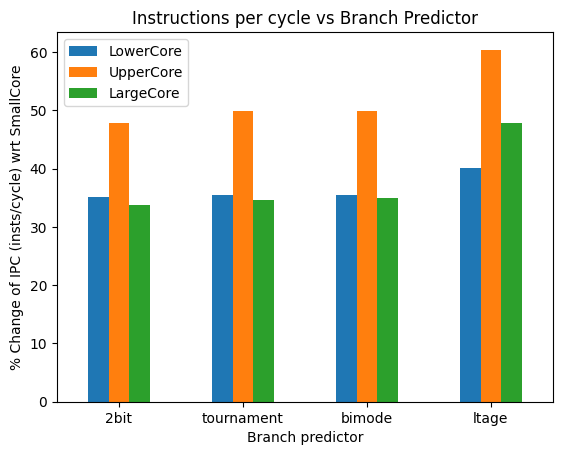

In [9]:
query_df = df.query(f'pipeline_width == {SmallCore.pw} and rob_entries == {SmallCore.rob}')
x_small = query_df["branch_predictor"].to_list()
y_small = query_df["system.cpu.ipc"].to_list()
y_baseline = y_small
print(f"SmallCore : {x_small} ; {y_small}")

query_df = df.query(f'pipeline_width == {LowerCore.pw} and rob_entries == {LowerCore.rob}')
x_lower = query_df["branch_predictor"].to_list()
y_lower = query_df["system.cpu.ipc"].to_list()
print(f"LowerCore : {x_lower} ; {y_lower}")
y_lower = percentage_change(y_lower, y_baseline)


query_df = df.query(f'pipeline_width == {MiddleCore.pw} and rob_entries == {MiddleCore.rob}')
x_middle = query_df["branch_predictor"].to_list()
y_middle = query_df["system.cpu.ipc"].to_list()
print(f"MiddleCore : {x_middle} ; {y_middle}")
y_middle = percentage_change(y_middle, y_baseline)


query_df = df.query(f'pipeline_width == {UpperCore.pw} and rob_entries == {UpperCore.rob}')
x_upper = query_df["branch_predictor"].to_list()
y_upper = query_df["system.cpu.ipc"].to_list()
print(f"UpperCore : {x_upper} ; {y_upper}")
y_upper = percentage_change(y_upper, y_baseline)


query_df = df.query(f'pipeline_width == {LargeCore.pw} and rob_entries == {LargeCore.rob}')
x_large = query_df["branch_predictor"].to_list()
y_large = query_df["system.cpu.ipc"].to_list()
print(f"LargeCore : {x_large} ; {y_large}")
y_large = percentage_change(y_large, y_baseline)


plot_df = pd.DataFrame({
LowerCore : y_lower,
# 'MiddleCore': y_middle,
UpperCore: y_upper,
LargeCore: y_large
}, index=x_large)


ax = plot_df.plot.bar(rot=0, label="")
# ax.set_ylim((0.68, 1.1))
ax.set_title("Instructions per cycle vs Branch Predictor")
ax.set_xlabel("Branch predictor")
ax.set_ylabel(f"% Change of IPC (insts/cycle) wrt {SmallCore}")
# ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.legend()
# figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)

# plot_bar_results(axis, x_small, y_small, "Instructions per cycle vs Branch Predictor", f"IPC values", "#1f77b4", "Branch predictor", "IPC (insts/cycle)")
# plot_bar_results(axis, x_large, y_large, "Instructions per cycle vs Branch Predictor", f"IPC values", "#ff7f0e", "Branch predictor", "IPC (insts/cycle)")

#### Simulation Seconds vs Branch Predictor

SmallCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.018356, 0.018073, 0.018076, 0.017474]
LowerCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.013586, 0.013335, 0.013334, 0.01247]
MiddleCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.013718, 0.013424, 0.013389, 0.011819]
UpperCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.012412, 0.012055, 0.012062, 0.010894]
LargeCore : ['2bit', 'tournament', 'bimode', 'ltage'] ; [0.013718, 0.013424, 0.013389, 0.011819]


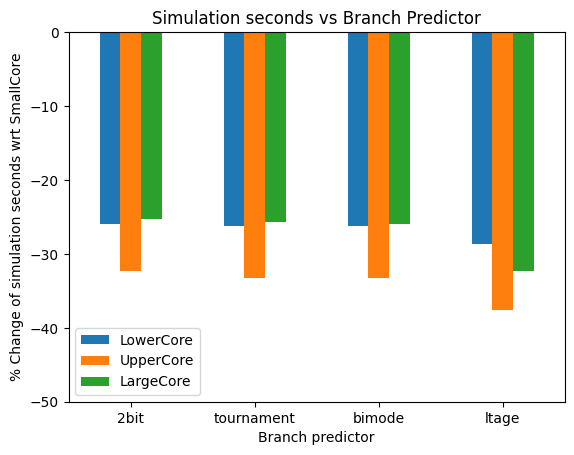

In [10]:
metric = "simSeconds"
query_df = df.query(f'pipeline_width == {SmallCore.pw} and rob_entries == {SmallCore.rob}')
x_small = query_df["branch_predictor"].to_list()
y_small = query_df[metric].to_list()
y_baseline = y_small
print(f"SmallCore : {x_small} ; {y_small}")

query_df = df.query(f'pipeline_width == {LowerCore.pw} and rob_entries == {LowerCore.rob}')
x_lower = query_df["branch_predictor"].to_list()
y_lower = query_df[metric].to_list()
print(f"LowerCore : {x_lower} ; {y_lower}")
y_lower = percentage_change(y_lower, y_baseline)


query_df = df.query(f'pipeline_width == {MiddleCore.pw} and rob_entries == {MiddleCore.rob}')
x_middle = query_df["branch_predictor"].to_list()
y_middle = query_df[metric].to_list()
print(f"MiddleCore : {x_middle} ; {y_middle}")
y_middle = percentage_change(y_middle, y_baseline)


query_df = df.query(f'pipeline_width == {UpperCore.pw} and rob_entries == {UpperCore.rob}')
x_upper = query_df["branch_predictor"].to_list()
y_upper = query_df[metric].to_list()
print(f"UpperCore : {x_upper} ; {y_upper}")
y_upper = percentage_change(y_upper, y_baseline)


query_df = df.query(f'pipeline_width == {LargeCore.pw} and rob_entries == {LargeCore.rob}')
x_large = query_df["branch_predictor"].to_list()
y_large = query_df[metric].to_list()
print(f"LargeCore : {x_large} ; {y_large}")
y_large = percentage_change(y_large, y_baseline)


plot_df = pd.DataFrame({
LowerCore : y_lower,
# 'MiddleCore': y_middle,
UpperCore: y_upper,
LargeCore: y_large
}, index=x_large)


ax = plot_df.plot.bar(rot=0, label="")
ax.set_ylim((-50, 0))
ax.set_title("Simulation seconds vs Branch Predictor")
ax.set_xlabel("Branch predictor")
ax.set_ylabel(f"% Change of simulation seconds wrt {SmallCore}")
# ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.legend()
# figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)

# plot_bar_results(axis, x_small, y_small, "Instructions per cycle vs Branch Predictor", f"IPC values", "#1f77b4", "Branch predictor", "IPC (insts/cycle)")
# plot_bar_results(axis, x_large, y_large, "Instructions per cycle vs Branch Predictor", f"IPC values", "#ff7f0e", "Branch predictor", "IPC (insts/cycle)")

#### IPC vs ROB Entries

SmallCore : [16, 32, 64, 128, 192] ; [0.693709, 0.777649, 0.779202, 0.779161, 0.779124]
LowerCore : [16, 32, 64, 128, 192] ; [7.58848450863402, 22.79601722628075, 30.16688868868406, 30.193631354752103, 30.20828520235545]
MiddleCore : [16, 32, 64, 128, 192] ; [15.237945593901763, 35.00242397276919, 44.599603183770064, 39.069973984837546, 38.284149891416504]
UpperCore : [16, 32, 64, 128, 192] ; [9.774847954978242, 24.787018307745516, 35.48835860277567, 36.070465539214624, 36.08912060211211]
LargeCore : [16, 32, 64, 128, 192] ; [15.237945593901763, 35.00242397276919, 44.599603183770064, 39.069973984837546, 38.284149891416504]


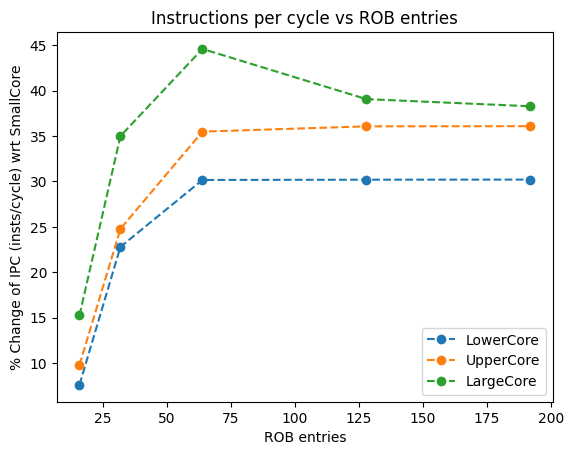

In [11]:
query_df = df.query(f"pipeline_width == {SmallCore.pw} and branch_predictor == '{SmallCore.bp}'")
x_small = query_df["rob_entries"].to_list()
y_small = query_df["system.cpu.ipc"].to_list()
y_baseline = y_small
print(f"SmallCore : {x_small} ; {y_small}")

query_df = df.query(f"pipeline_width == {LowerCore.pw} and branch_predictor == '{LowerCore.bp}'")
x_lower = query_df["rob_entries"].to_list()
y_lower = query_df["system.cpu.ipc"].to_list()
y_lower = percentage_change(y_lower, y_baseline)
print(f"LowerCore : {x_lower} ; {y_lower}")

query_df = df.query(f"pipeline_width == {MiddleCore.pw} and branch_predictor == '{MiddleCore.bp}'")
x_middle = query_df["rob_entries"].to_list()
y_middle = query_df["system.cpu.ipc"].to_list()
y_middle = percentage_change(y_middle, y_baseline)
print(f"MiddleCore : {x_middle} ; {y_middle}")

query_df = df.query(f"pipeline_width == {UpperCore.pw} and branch_predictor == '{UpperCore.bp}'")
x_upper = query_df["rob_entries"].to_list()
y_upper = query_df["system.cpu.ipc"].to_list()
y_upper = percentage_change(y_upper, y_baseline)
print(f"UpperCore : {x_upper} ; {y_upper}")


query_df = df.query(f"pipeline_width == {LargeCore.pw} and branch_predictor == '{LargeCore.bp}'")
x_large = query_df["rob_entries"].to_list()
y_large = query_df["system.cpu.ipc"].to_list()
y_large = percentage_change(y_large, y_baseline)
print(f"LargeCore : {x_large} ; {y_large}")

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_title = "Instructions per cycle vs ROB entries"
x_title = "ROB entries"
y_title = f"% Change of IPC (insts/cycle) wrt {SmallCore}"
# plot_results(axis, x_small, y_small, "Instructions per cycle vs Pipeline width", f"ROB: 16; BP: 2bit", None, "Pipeline width", "IPC (insts/cycle)")
plot_results(axis, x_lower, y_lower, plot_title, LowerCore, None, x_title, y_title)
# plot_results(axis, x_middle, y_middle, plot_title, MiddleCore, None, x_title, y_title)
plot_results(axis, x_upper, y_upper, plot_title, UpperCore, None, x_title, y_title)
plot_results(axis, x_large, y_large, plot_title, LargeCore, None, x_title, y_title)


### Simulation Seconds vs ROB entries

SmallCore : [16, 32, 64, 128, 192] ; [0.018356, 0.016375, 0.016342, 0.016343, 0.016344]
LowerCore : [16, 32, 64, 128, 192] ; [-7.054913924602316, -18.564885496183212, -23.173418186268503, -23.190356727650983, -23.201174743024964]
MiddleCore : [16, 32, 64, 128, 192] ; [-13.221834822401405, -25.92977099236642, -30.840778362501524, -28.091537661384077, -27.686000978952528]
UpperCore : [16, 32, 64, 128, 192] ; [-8.901721507953802, -19.865648854961837, -26.19018479990209, -26.506761304534045, -26.517376407244253]
LargeCore : [16, 32, 64, 128, 192] ; [-13.221834822401405, -25.92977099236642, -30.840778362501524, -28.091537661384077, -27.686000978952528]


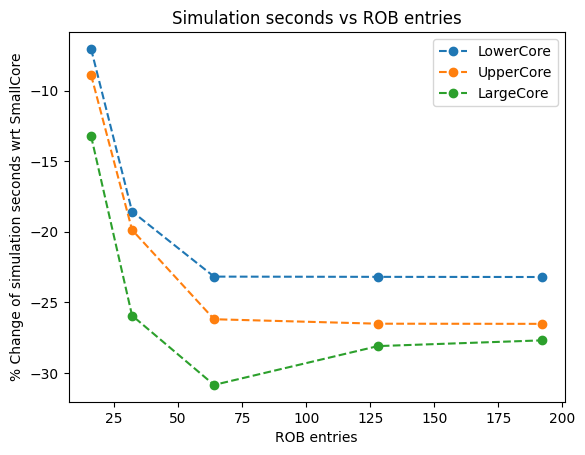

In [12]:
metric = "simSeconds"
query_df = df.query(f"pipeline_width == {SmallCore.pw} and branch_predictor == '{SmallCore.bp}'")
x_small = query_df["rob_entries"].to_list()
y_small = query_df[metric].to_list()
y_baseline = y_small
print(f"SmallCore : {x_small} ; {y_small}")

query_df = df.query(f"pipeline_width == {LowerCore.pw} and branch_predictor == '{LowerCore.bp}'")
x_lower = query_df["rob_entries"].to_list()
y_lower = query_df[metric].to_list()
y_lower = percentage_change(y_lower, y_baseline)
print(f"LowerCore : {x_lower} ; {y_lower}")

query_df = df.query(f"pipeline_width == {MiddleCore.pw} and branch_predictor == '{MiddleCore.bp}'")
x_middle = query_df["rob_entries"].to_list()
y_middle = query_df[metric].to_list()
y_middle = percentage_change(y_middle, y_baseline)
print(f"MiddleCore : {x_middle} ; {y_middle}")

query_df = df.query(f"pipeline_width == {UpperCore.pw} and branch_predictor == '{UpperCore.bp}'")
x_upper = query_df["rob_entries"].to_list()
y_upper = query_df[metric].to_list()
y_upper = percentage_change(y_upper, y_baseline)
print(f"UpperCore : {x_upper} ; {y_upper}")


query_df = df.query(f"pipeline_width == {LargeCore.pw} and branch_predictor == '{LargeCore.bp}'")
x_large = query_df["rob_entries"].to_list()
y_large = query_df[metric].to_list()
y_large = percentage_change(y_large, y_baseline)
print(f"LargeCore : {x_large} ; {y_large}")

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_title = "Simulation seconds vs ROB entries"
x_title = "ROB entries"
y_title = f"% Change of simulation seconds wrt {SmallCore}"
# plot_results(axis, x_small, y_small, "Instructions per cycle vs Pipeline width", f"ROB: 16; BP: 2bit", None, "Pipeline width", "IPC (insts/cycle)")
plot_results(axis, x_lower, y_lower, plot_title, LowerCore, None, x_title, y_title)
# plot_results(axis, x_middle, y_middle, plot_title, MiddleCore, None, x_title, y_title)
plot_results(axis, x_upper, y_upper, plot_title, UpperCore, None, x_title, y_title)
plot_results(axis, x_large, y_large, plot_title, LargeCore, None, x_title, y_title)


#### IPC vs Pipeline width

SmallCore : [2, 4, 6, 8] ; [0.693709, 0.733772, 0.74825, 0.755303]
LowerCore : [2, 4, 6, 8] ; [14.510695406863688, 30.138789705794178, 29.742599398596727, 29.736278023521702]
MiddleCore : [2, 4, 6, 8] ; [20.65246378524712, 50.76181702218127, 57.21323087203474, 42.645401911550735]
UpperCore : [2, 4, 6, 8] ; [14.677191733133048, 38.23762694679001, 41.09295021717341, 34.36885594258198]
LargeCore : [2, 4, 6, 8] ; [20.65246378524712, 50.76181702218127, 57.21323087203474, 42.645401911550735]


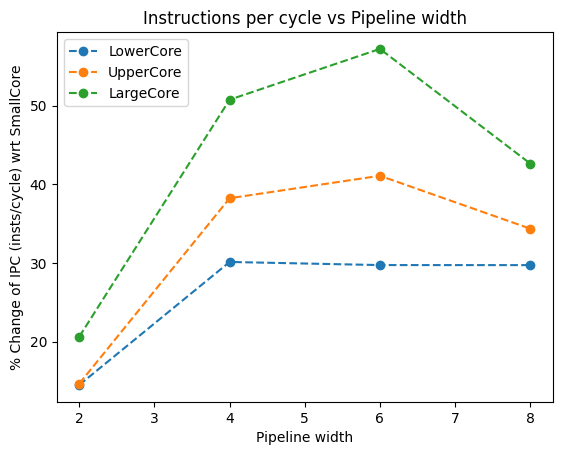

In [13]:
metric = "system.cpu.ipc"

query_df = df.query(f"rob_entries == {SmallCore.rob} and branch_predictor == '{SmallCore.bp}'")
x_small = query_df["pipeline_width"].to_list()
y_small = query_df[metric].to_list()
y_baseline = y_small
print(f"SmallCore : {x_small} ; {y_small}")

query_df = df.query(f"rob_entries == {LowerCore.rob} and branch_predictor == '{LowerCore.bp}'")
x_lower = query_df["pipeline_width"].to_list()
y_lower = query_df[metric].to_list()
y_lower = percentage_change(y_lower, y_baseline)
print(f"LowerCore : {x_lower} ; {y_lower}")

query_df = df.query(f"rob_entries == {MiddleCore.rob} and branch_predictor == '{MiddleCore.bp}'")
x_middle = query_df["pipeline_width"].to_list()
y_middle = query_df[metric].to_list()
y_middle = percentage_change(y_middle, y_baseline)
print(f"MiddleCore : {x_middle} ; {y_middle}")

query_df = df.query(f"rob_entries == {UpperCore.rob} and branch_predictor == '{UpperCore.bp}'")
x_upper = query_df["pipeline_width"].to_list()
y_upper = query_df[metric].to_list()
y_upper = percentage_change(y_upper, y_baseline)
print(f"UpperCore : {x_upper} ; {y_upper}")


query_df = df.query(f"rob_entries == {LargeCore.rob} and branch_predictor == '{LargeCore.bp}'")
x_large = query_df["pipeline_width"].to_list()
y_large = query_df[metric].to_list()
y_large = percentage_change(y_large, y_baseline)
print(f"LargeCore : {x_large} ; {y_large}")

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_title = "Instructions per cycle vs Pipeline width"
x_title = "Pipeline width"
y_title = f"% Change of IPC (insts/cycle) wrt {SmallCore}"
# plot_results(axis, x_small, y_small, "Instructions per cycle vs Pipeline width", f"ROB: 16; BP: 2bit", None, "Pipeline width", "IPC (insts/cycle)")
plot_results(axis, x_lower, y_lower, plot_title, LowerCore, None, x_title, y_title)
# plot_results(axis, x_middle, y_middle, plot_title, MiddleCore, None, x_title, y_title)
plot_results(axis, x_upper, y_upper, plot_title, UpperCore, None, x_title, y_title)
plot_results(axis, x_large, y_large, plot_title, LargeCore, None, x_title, y_title)


### Simulation Seconds vs Pipeline width

SmallCore : [2, 4, 6, 8] ; [0.018356, 0.017354, 0.017018, 0.016859]
LowerCore : [2, 4, 6, 8] ; [-12.671606014382228, -23.158925896047027, -22.922787636620043, -22.91950886766712]
MiddleCore : [2, 4, 6, 8] ; [-17.117018958378736, -33.66947101532788, -36.390880244447054, -29.895011566522328]
UpperCore : [2, 4, 6, 8] ; [-12.796905643931142, -27.659329261265423, -29.122106005406035, -25.576843229135765]
LargeCore : [2, 4, 6, 8] ; [-17.117018958378736, -33.66947101532788, -36.390880244447054, -29.895011566522328]


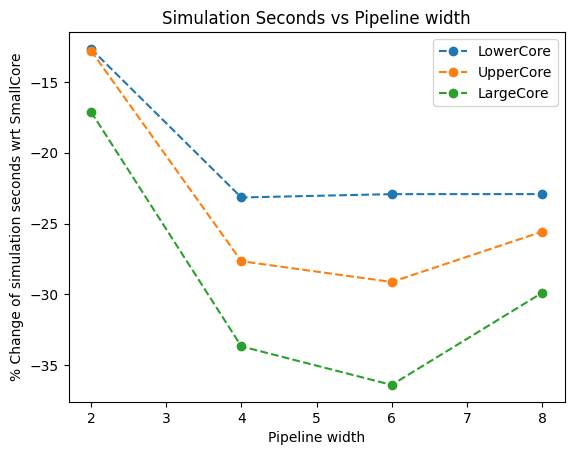

In [14]:
metric = "simSeconds"

query_df = df.query(f"rob_entries == {SmallCore.rob} and branch_predictor == '{SmallCore.bp}'")
x_small = query_df["pipeline_width"].to_list()
y_small = query_df[metric].to_list()
y_baseline = y_small
print(f"SmallCore : {x_small} ; {y_small}")

query_df = df.query(f"rob_entries == {LowerCore.rob} and branch_predictor == '{LowerCore.bp}'")
x_lower = query_df["pipeline_width"].to_list()
y_lower = query_df[metric].to_list()
y_lower = percentage_change(y_lower, y_baseline)
print(f"LowerCore : {x_lower} ; {y_lower}")

query_df = df.query(f"rob_entries == {MiddleCore.rob} and branch_predictor == '{MiddleCore.bp}'")
x_middle = query_df["pipeline_width"].to_list()
y_middle = query_df[metric].to_list()
y_middle = percentage_change(y_middle, y_baseline)
print(f"MiddleCore : {x_middle} ; {y_middle}")

query_df = df.query(f"rob_entries == {UpperCore.rob} and branch_predictor == '{UpperCore.bp}'")
x_upper = query_df["pipeline_width"].to_list()
y_upper = query_df[metric].to_list()
y_upper = percentage_change(y_upper, y_baseline)
print(f"UpperCore : {x_upper} ; {y_upper}")


query_df = df.query(f"rob_entries == {LargeCore.rob} and branch_predictor == '{LargeCore.bp}'")
x_large = query_df["pipeline_width"].to_list()
y_large = query_df[metric].to_list()
y_large = percentage_change(y_large, y_baseline)
print(f"LargeCore : {x_large} ; {y_large}")

figure, axis = plt.subplots(nrows=1, ncols=1, sharex=False,)
plot_title = "Simulation Seconds vs Pipeline width"
x_title = "Pipeline width"
y_title = f"% Change of simulation seconds wrt {SmallCore}"
# plot_results(axis, x_small, y_small, "Instructions per cycle vs Pipeline width", f"ROB: 16; BP: 2bit", None, "Pipeline width", "IPC (insts/cycle)")
plot_results(axis, x_lower, y_lower, plot_title, LowerCore, None, x_title, y_title)
# plot_results(axis, x_middle, y_middle, plot_title, MiddleCore, None, x_title, y_title)
plot_results(axis, x_upper, y_upper, plot_title, UpperCore, None, x_title, y_title)
plot_results(axis, x_large, y_large, plot_title, LargeCore, None, x_title, y_title)


Since the search space is huge, we start by fixing two parameters of large and small core and vary the third one. By performing the above experiments, we hope to figure out the best parameter and then experiment with that design incrementally

We set good core's pipeline width to be 6, ROB to be 64 and bimode 

## Performance improvements

In [15]:
query_df = df.query(f"(pipeline_width == {SmallCore.pw} and rob_entries == {SmallCore.rob} and branch_predictor == '{SmallCore.bp}') \
or (pipeline_width == {GoodCore.pw} and rob_entries == {GoodCore.rob} and branch_predictor == '{GoodCore.bp}') \
    or (pipeline_width == {LargeCore.pw} and rob_entries == {LargeCore.rob} and branch_predictor == '{LargeCore.bp}')    ")

In [16]:
query_df

,experiment_name,pipeline_width,rob_entries,branch_predictor,simSeconds,simInsts,system.cpu.numCycles,system.cpu.numInsts,system.cpu.ipc,system.cpu.commit.branchMispredicts,...,system.cpu.commit.committedInstType_0::MemRead,system.cpu.commit.committedInstType_0::MemWrite,system.mem_ctrls.avgRdBWSys,system.mem_ctrls.avgWrBWSys,system.cpu.dcache.overallAvgMissLatency::total,system.l2cache.overallAvgMissLatency::total,system.mem_ctrls.dram.rank0.averagePower,system.mem_ctrls.dram.rank1.averagePower,system.mem_ctrls.dram.rank0.totalEnergy,system.mem_ctrls.dram.rank1.totalEnergy
experiment_index,,,,,,,,,,,,,,,,,,,,,
1,exp_1_2_width_16_rob_2bit_predictor,2,16,2bit,0.018356,27246366,36712035,41654003,0.693709,577041,...,11958827,2898857,6872078.870049,4232726.407022,13252.889954,61242.516489,466.688121,469.684448,8566535310,8621535945
52,exp_52_6_width_64_rob_ltage_predictor,6,64,ltage,0.010894,27246366,21788082,50600895,1.168871,428404,...,11958827,2898857,11273686.229013,7037976.082521,10649.541318,58722.251172,467.644161,470.38298,5094534660,5124371475
80,exp_80_8_width_192_rob_ltage_predictor,8,192,ltage,0.011819,27246366,23637778,60422058,1.077405,444256,...,11958827,2898857,10331935.599023,6454752.219096,10639.348592,59293.392764,467.159258,469.578565,5521303410,5549896935


In [17]:
print(query_df["simSeconds"])
print(f"Execution time speedup GoodCore: {0.018356/0.010894}")
print(f"Execution time speedup LargeCore: {0.018356/0.011819}")

experiment_index
1     0.018356
52    0.010894
80    0.011819
Name: simSeconds, dtype: Float64
Execution time speedup GoodCore: 1.684964200477327
Execution time speedup LargeCore: 1.5530924782130469


In [18]:
print(query_df["system.cpu.ipc"])
print(f"IPC % change GoodCore: {(1.168871 - 0.693709)*100/0.693709} %")
print(f"IPC % change LargeCore: {(1.077405 - 0.693709)*100/0.693709} %")

experiment_index
1     0.693709
52    1.168871
80    1.077405
Name: system.cpu.ipc, dtype: Float64
IPC % change GoodCore: 68.49586786390259 %
IPC % change LargeCore: 55.31080035000265 %
